In [3]:
import pandas as pd

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
data = pd.read_csv(url, names=column_names, na_values=" ?", sep=r'\s*,\s*', engine='python')

# Basic exploration
data.info()
data.describe()

import matplotlib.pyplot as plt
import seaborn as sns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


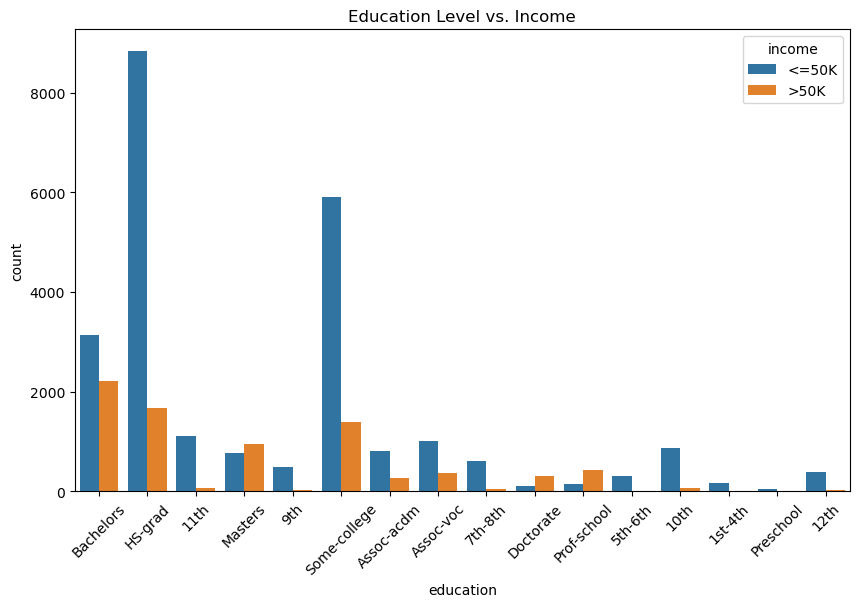

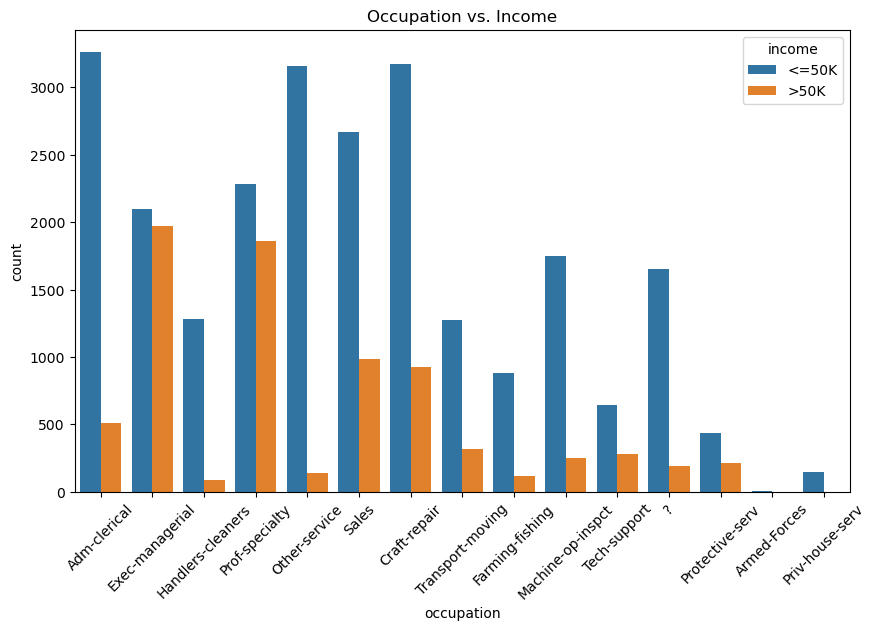

c:\Users\shrek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


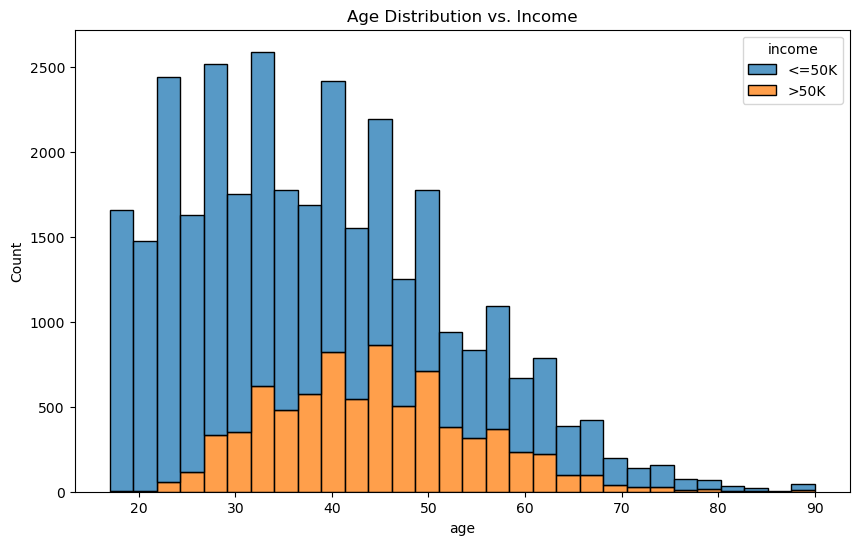

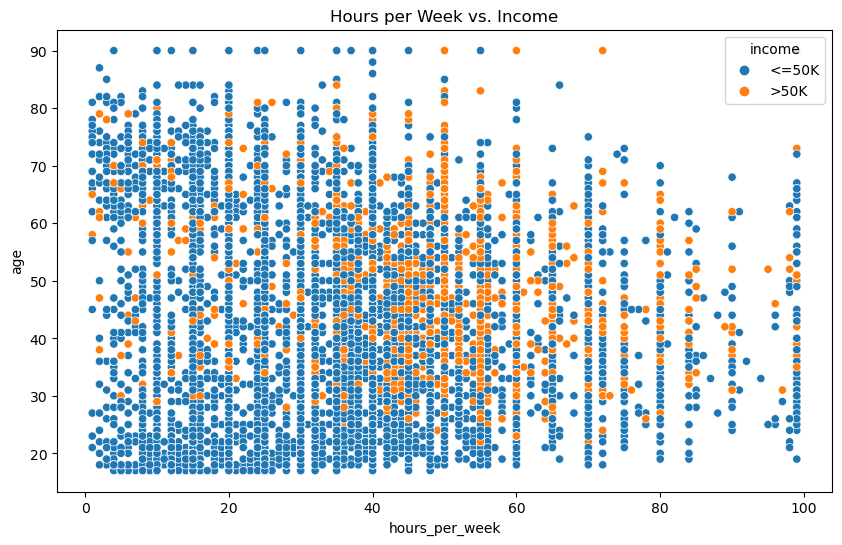

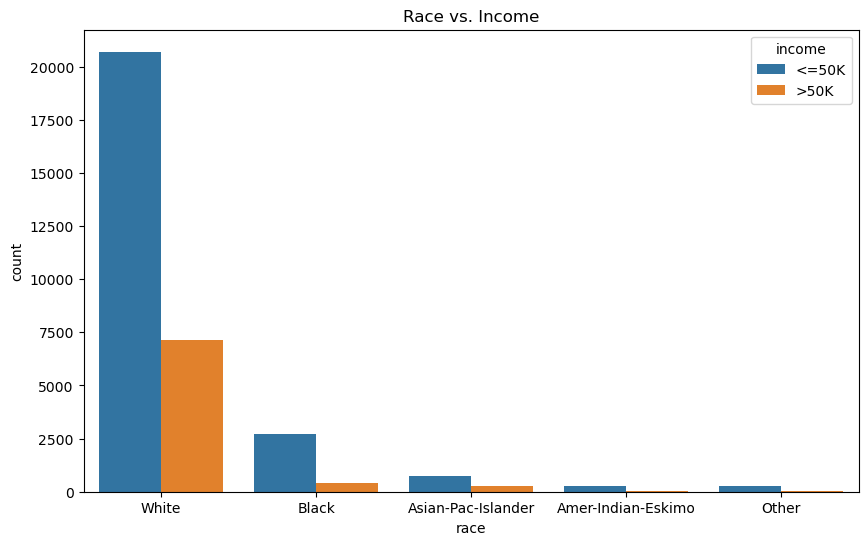

In [4]:
# Education vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Education Level vs. Income')
plt.show()

# Occupation vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Occupation vs. Income')
plt.show()

# Age distribution vs. Income
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='income', multiple='stack', bins=30)
plt.title('Age Distribution vs. Income')
plt.show()

# Hours per week vs. Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours_per_week', y='age', hue='income', data=data)
plt.title('Hours per Week vs. Income')
plt.show()

# Race vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=data)
plt.title('Race vs. Income')
plt.show()



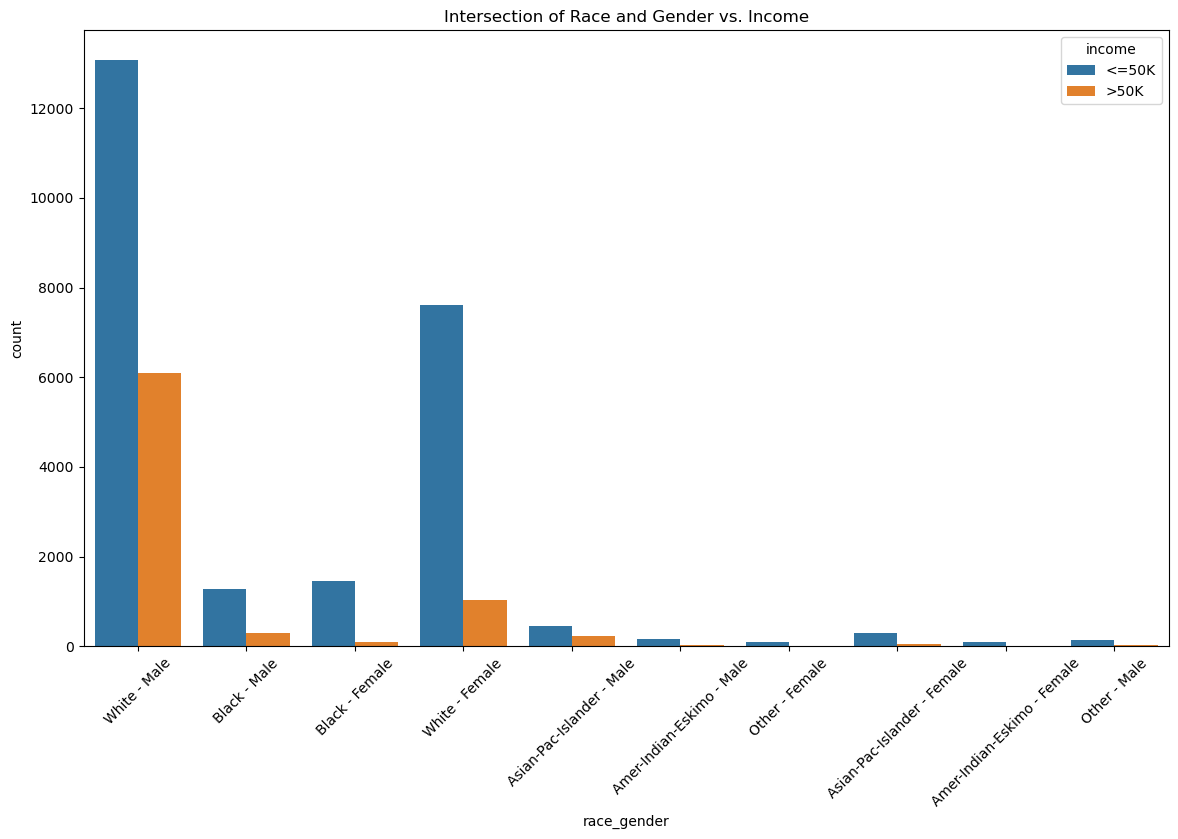

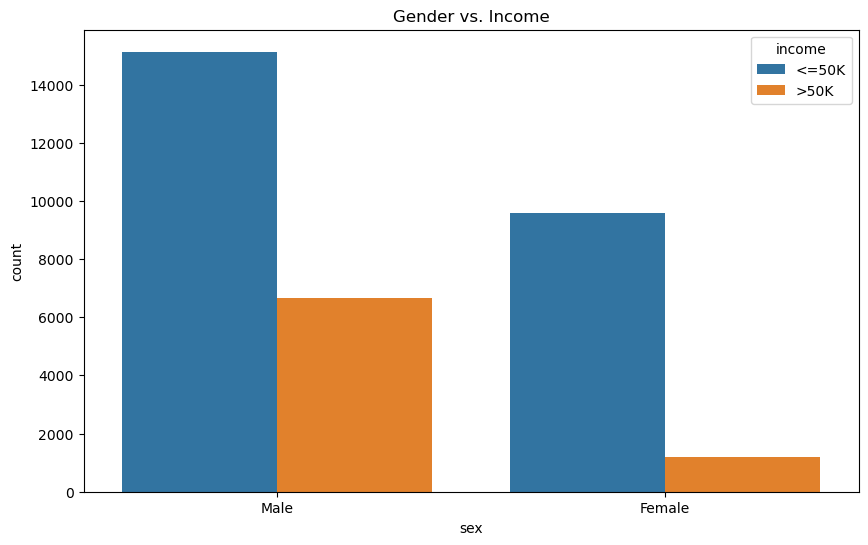

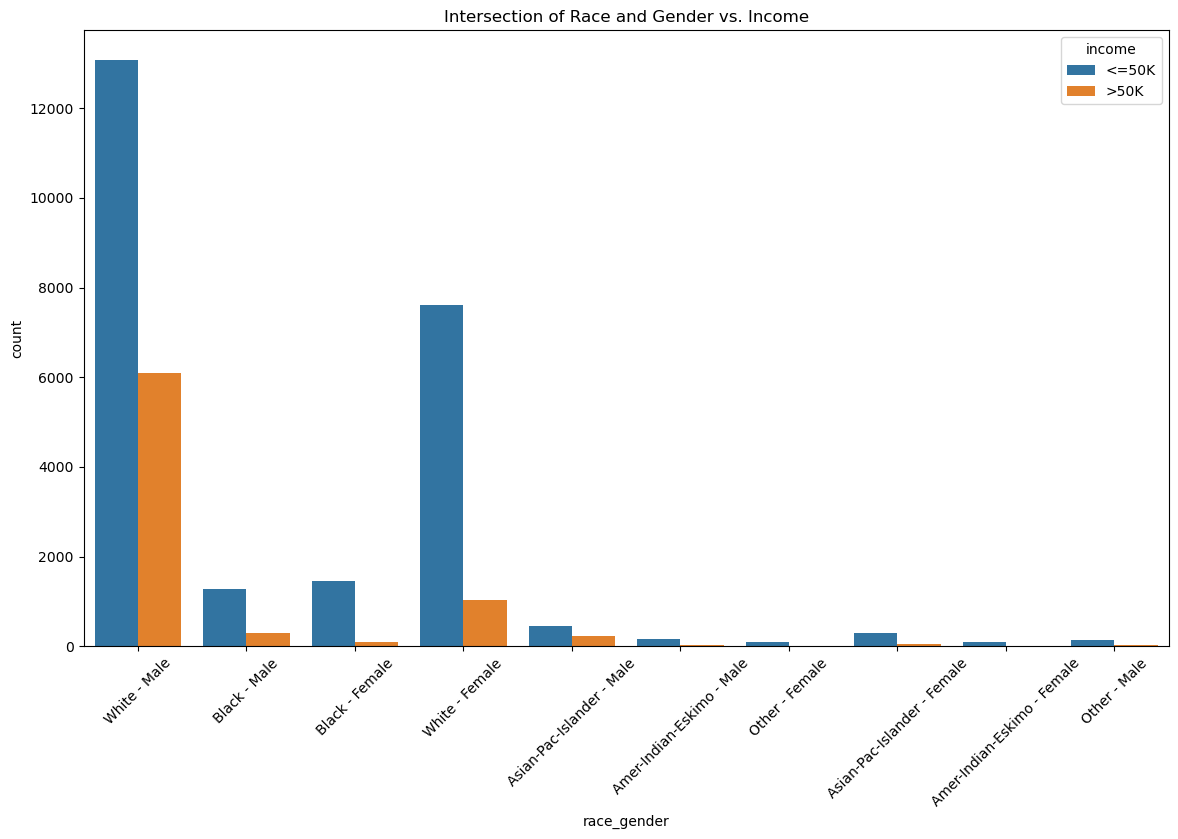

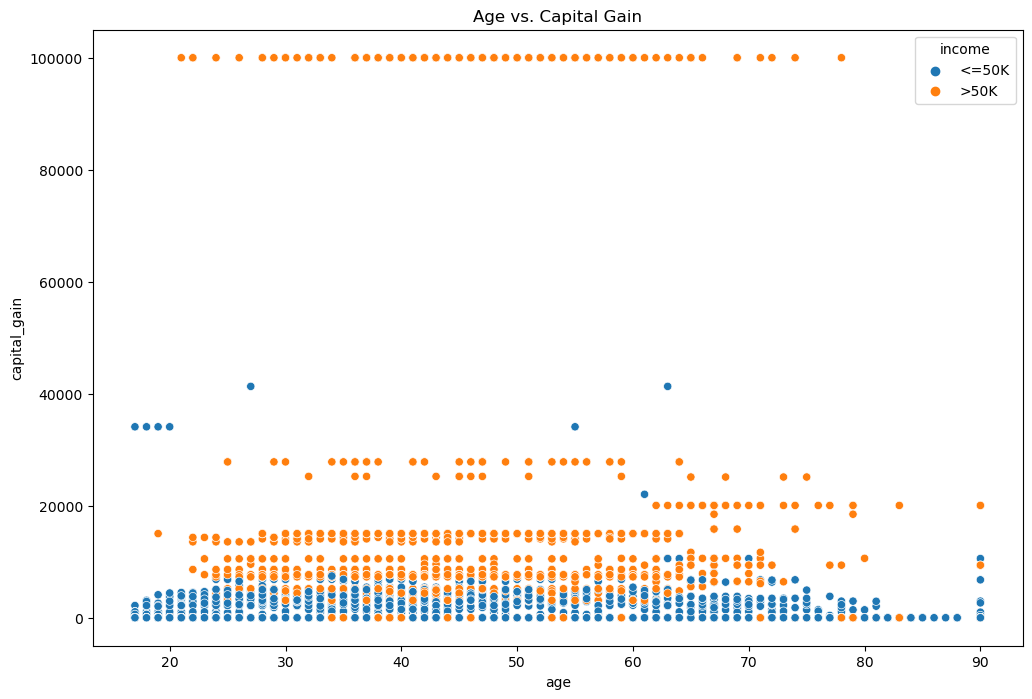

T-statistic: 42.583873499437956, P-value: 0.0


In [5]:

# Create a combined column for Race and Gender
data['race_gender'] = data['race'] + ' - ' + data['sex']

plt.figure(figsize=(14, 8))
sns.countplot(x='race_gender', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Intersection of Race and Gender vs. Income')
plt.show()

# Gender vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=data)
plt.title('Gender vs. Income')
plt.show()


# Create a combined column for Race and Gender
data['race_gender'] = data['race'] + ' - ' + data['sex']

plt.figure(figsize=(14, 8))
sns.countplot(x='race_gender', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Intersection of Race and Gender vs. Income')
plt.show()

# Age vs. Capital Gain
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='capital_gain', hue='income', data=data)
plt.title('Age vs. Capital Gain')
plt.show()

#Do higher income people tend to work more hours per week?
from scipy import stats

high_income = data[data['income'] == '>50K']
low_income = data[data['income'] == '<=50K']

t_stat, p_val = stats.ttest_ind(high_income['hours_per_week'], low_income['hours_per_week'])
print(f"T-statistic: {t_stat}, P-value: {p_val}")

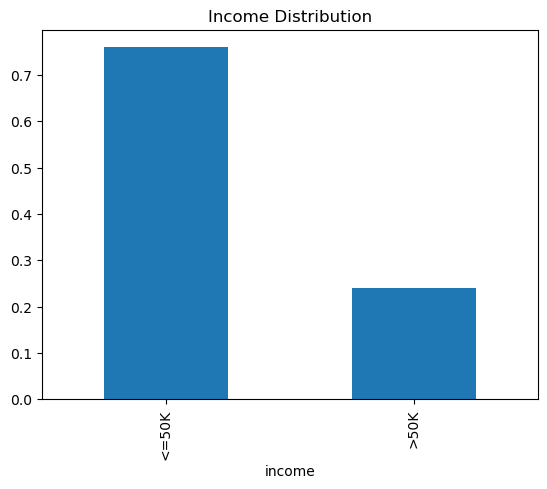

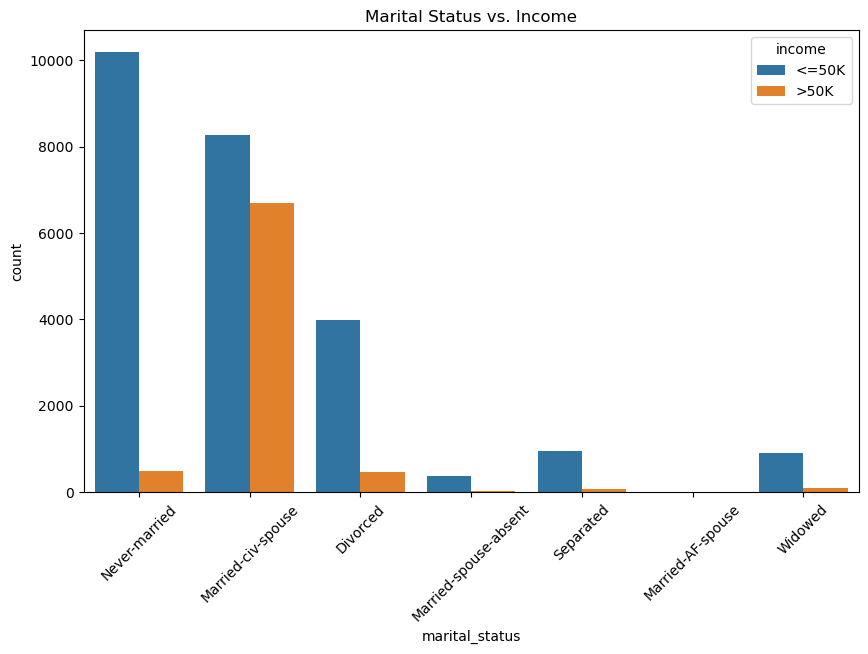

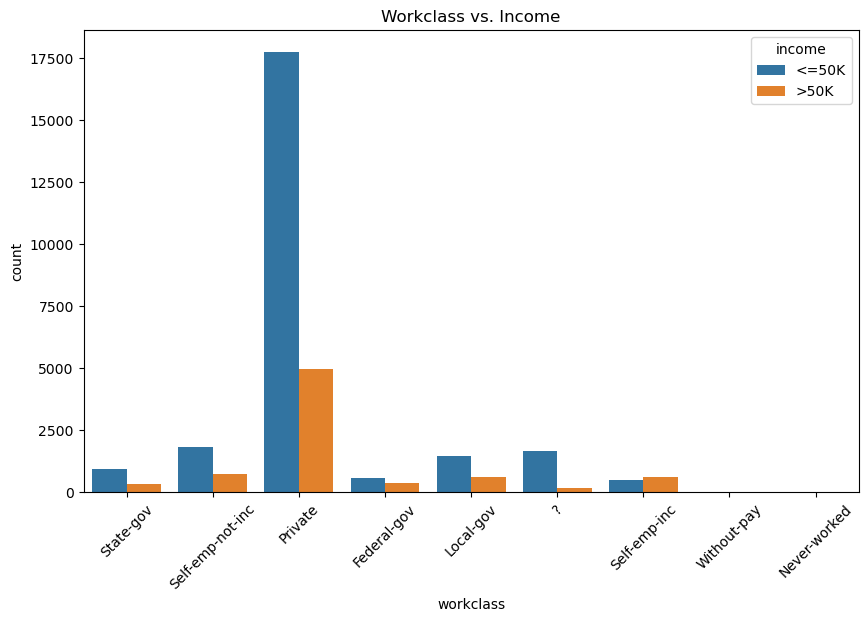

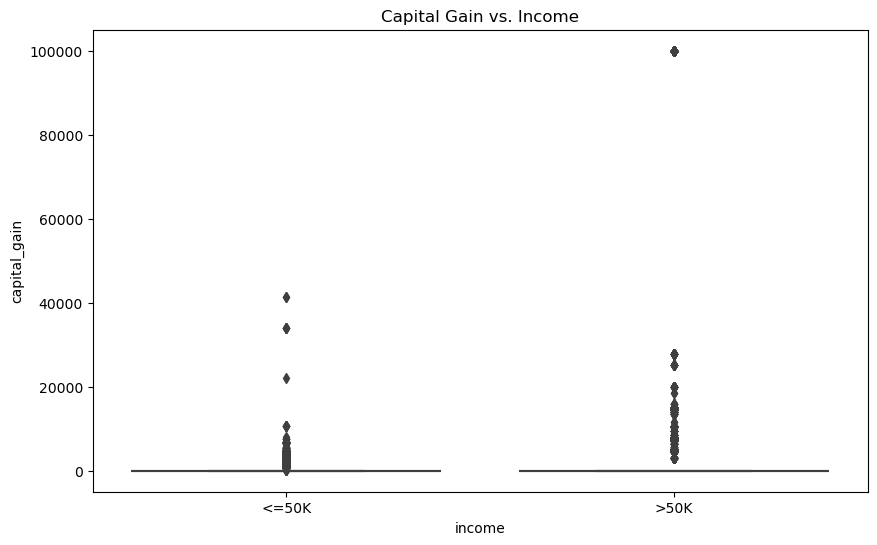

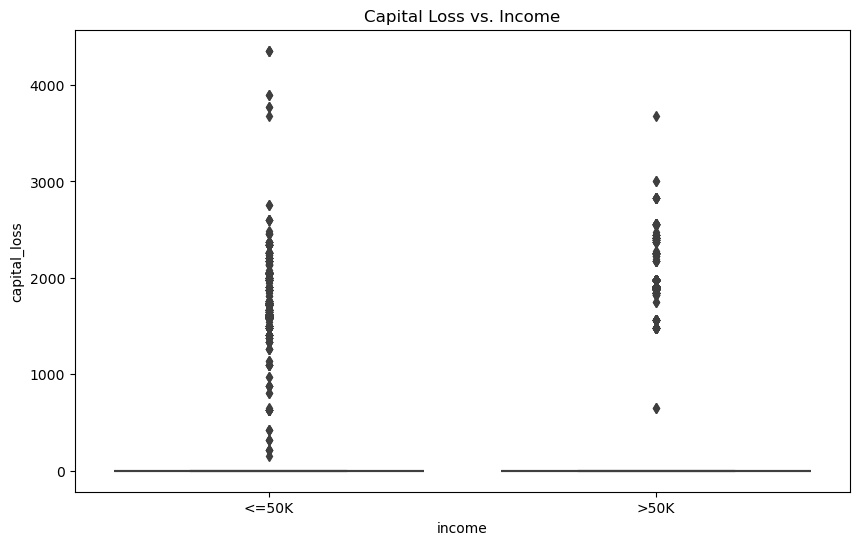

In [7]:
# Income Distribution
data['income'].value_counts(normalize=True).plot(kind='bar', title='Income Distribution')
plt.show()

# Marital Status vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='marital_status', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Marital Status vs. Income')
plt.show()

# Workclass vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Workclass vs. Income')
plt.show()

# Capital Gain vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital_gain', data=data)
plt.title('Capital Gain vs. Income')
plt.show()

# Capital Loss vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='capital_loss', data=data)
plt.title('Capital Loss vs. Income')
plt.show()



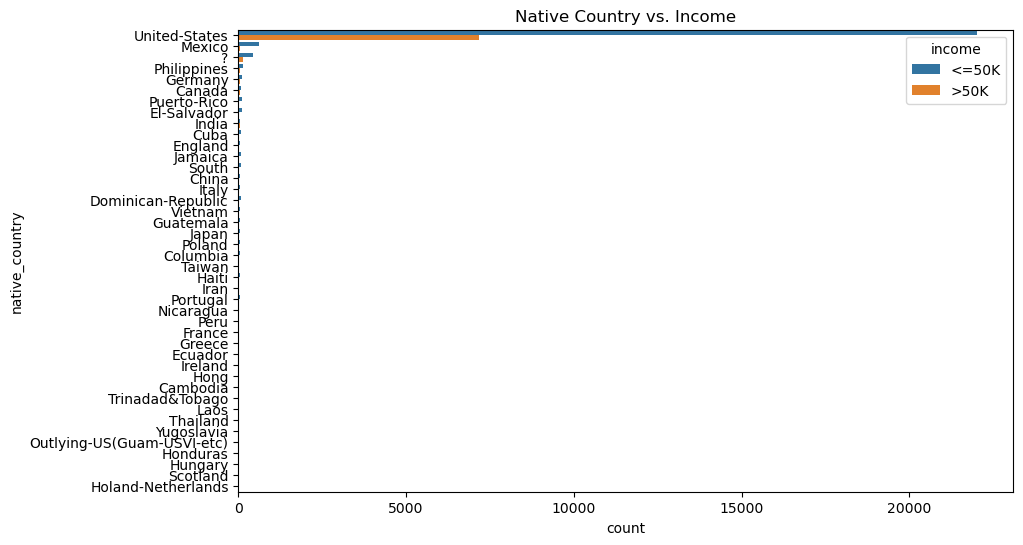

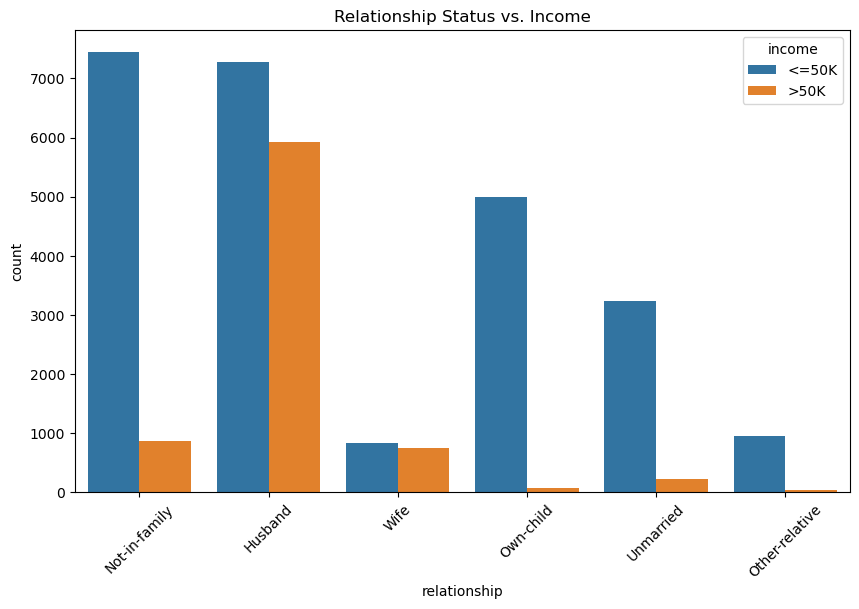

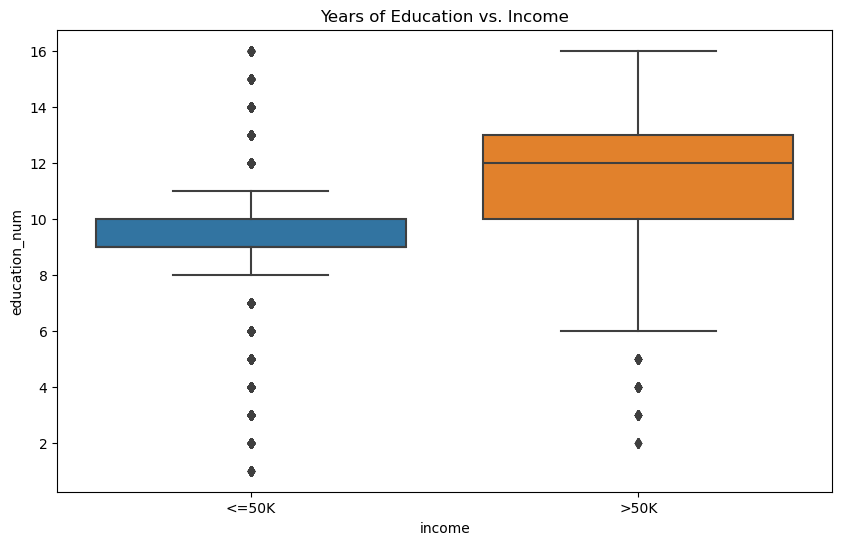

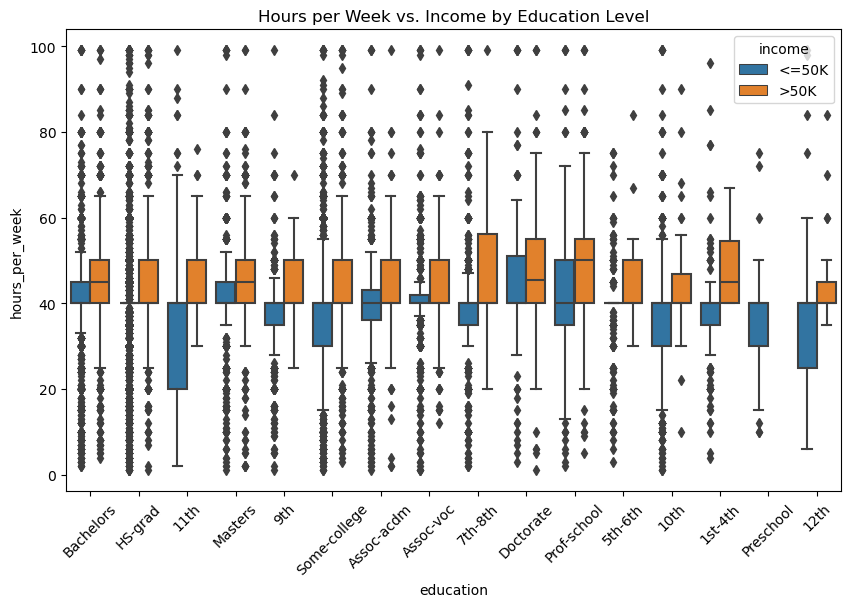

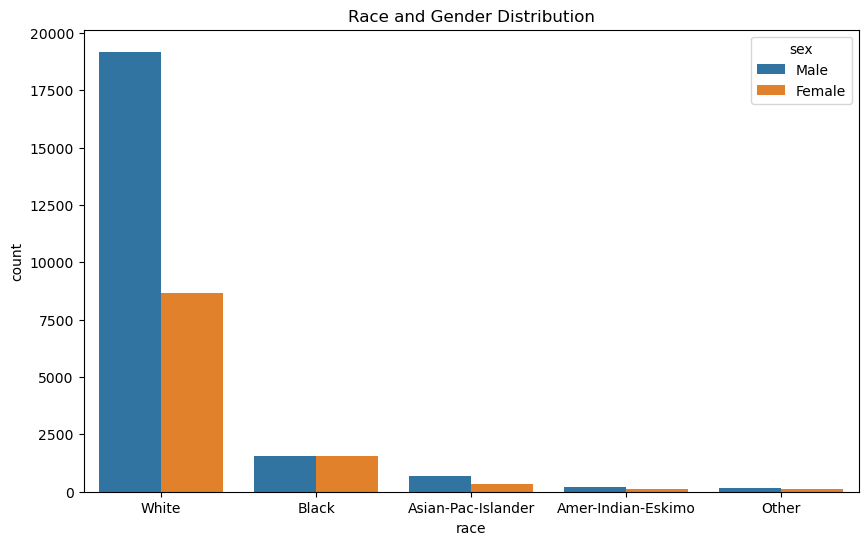

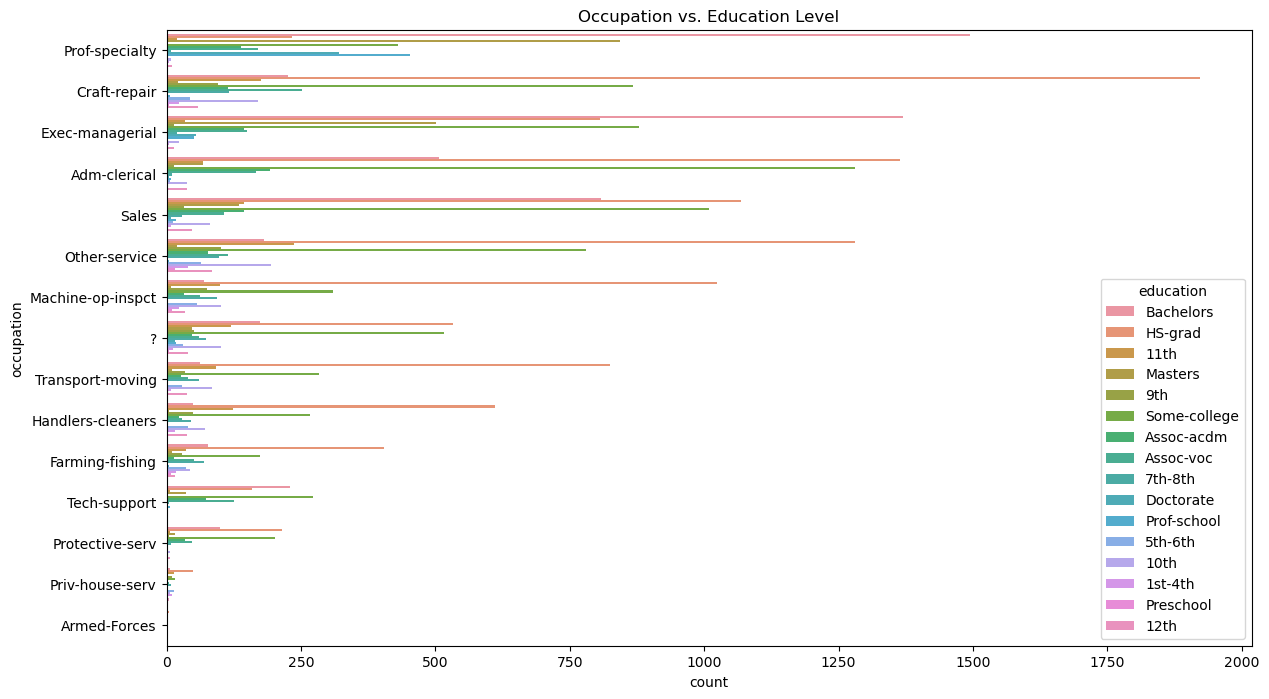

In [8]:
# Native Country vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(y='native_country', hue='income', data=data, order=data['native_country'].value_counts().index)
plt.title('Native Country vs. Income')
plt.show()

# Relationship Status vs. Income
plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Relationship Status vs. Income')
plt.show()

# Years of Education vs. Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='education_num', data=data)
plt.title('Years of Education vs. Income')
plt.show()

# Hours per Week vs. Income by Education Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='education', y='hours_per_week', hue='income', data=data)
plt.xticks(rotation=45)
plt.title('Hours per Week vs. Income by Education Level')
plt.show()

# Race and Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='sex', data=data)
plt.title('Race and Gender Distribution')
plt.show()

# Occupation vs. Education Level
plt.figure(figsize=(14, 8))
sns.countplot(y='occupation', hue='education', data=data, order=data['occupation'].value_counts().index)
plt.title('Occupation vs. Education Level')
plt.show()

In [9]:
# Create a markdown cell with the summary and conclusions

summary = """
### Summary and Conclusions
**Questions Asked:**
1. What factors contribute to higher income?
2. Are there noticeable trends based on age, education, or occupation?
3. How do demographics such as race and gender affect income levels?
4. Do higher income individuals tend to work more hours per week?
5. How does marital status affect income levels?
6. Which workclasses are associated with higher income levels?
7. How do capital gains and losses differ between income groups?
8. Does the country of origin affect income levels?
9. How does relationship status correlate with income levels?
10. How does the number of years of education affect income?
11. What is the distribution of race and gender in the dataset?
12. What are the most common occupations for each education level?

**Trends Investigated:**
1. **Education Level vs. Income:** Higher education levels generally correlate with higher income.
2. **Occupation vs. Income:** Certain occupations tend to have higher income levels.
3. **Age Distribution vs. Income:** Income tends to increase with age up to a certain point.
4. **Hours per Week vs. Income:** Higher income individuals generally work more hours per week.
5. **Race vs. Income:** Noticeable income disparities across different races.
6. **Intersection of Race and Gender vs. Income:** Deeper insights into income disparities based on race and gender.
7. **Gender vs. Income:** Significant gender disparity in income, with males generally earning more.
8. **Age vs. Capital Gain:** Higher capital gains observed among older individuals with higher income levels.
9. **Do Higher Income People Tend to Work More Hours per Week?:** The t-test shows a statistically significant difference in hours worked per week between higher and lower income groups.
10. **Marital Status vs. Income:** Certain marital statuses are associated with higher income levels.
11. **Workclass vs. Income:** Specific workclasses are associated with higher income levels.
12. **Capital Gain/Loss vs. Income:** Higher capital gains and lower capital losses are associated with higher income levels.
13. **Native Country vs. Income:** Certain countries of origin show higher income levels.
14. **Relationship Status vs. Income:** Different relationship statuses show varying income levels.
15. **Years of Education vs. Income:** More years of education generally correlate with higher income.
16. **Race and Gender Distribution:** Provides insights into the distribution of race and gender in the dataset.
17. **Occupation vs. Education Level:** Shows the most common occupations for each education level.

**Conclusion:**
The analysis provides a comprehensive understanding of the factors contributing to income disparities. Education, occupation, and demographic factors such as race, gender, marital status, and country of origin play significant roles in determining income levels. The insights gained from this analysis can help inform policy decisions aimed at addressing income inequality.
"""

print(summary)


### Summary and Conclusions
**Questions Asked:**
1. What factors contribute to higher income?
2. Are there noticeable trends based on age, education, or occupation?
3. How do demographics such as race and gender affect income levels?
4. Do higher income individuals tend to work more hours per week?
5. How does marital status affect income levels?
6. Which workclasses are associated with higher income levels?
7. How do capital gains and losses differ between income groups?
8. Does the country of origin affect income levels?
9. How does relationship status correlate with income levels?
10. How does the number of years of education affect income?
11. What is the distribution of race and gender in the dataset?
12. What are the most common occupations for each education level?

**Trends Investigated:**
1. **Education Level vs. Income:** Higher education levels generally correlate with higher income.
2. **Occupation vs. Income:** Certain occupations tend to have higher income levels.
3. **A